In [12]:
import numpy as np
import json
import scipy
from scipy import linalg, optimize
from recompilation_functions import random_gaussian_interactions

In [13]:
#variables

omegas=[0.28,0.38,0.63,0.86] #qubits frequency

nr=100 #number of disorder realizations
nb_qubits=4 #system size
t=10 #time to which the computation is performed


backend = 'ibm_hanoi'
session='thermalization 1'
nb_twirls_RC=100 #number of RC circuits per disorder realization

nb_shots_RC=1000 #number of shots per circuit

In [14]:
def IBU(ymes,t0,Rin,n):
    #This is the iterative Bayesian unfolding method.
    #Rin is a matrix where the first coordinate is the measured value and the second coordinate is the true value.
    #n is the number of iterations.
    
    tn = t0
    for q in range(n):
        out = []
        for j in range(len(t0)):
            mynum = 0.
            for i in range(len(ymes)):
                myden = 0.
                for k in range(len(t0)):
                    myden+=Rin[i][k]*tn[k]
                    pass
                mynum+=Rin[i][j]*tn[j]*ymes[i]/myden
                pass
            out+=[mynum]
        tn = out
        pass
    '''
    tn = t0
    for i in range(n):
        Rjitni = [np.array(Rin[:][i])*tn[i] for i in range(len(tn))]
        Pm_given_t = Rjitni / np.matmul(Rin,tn)
        tn = np.dot(Pm_given_t,ymes)
        pass
    '''
    return tn




In [15]:
#initialisation of the state for continuous time evolution
ini_state=[1/2**(nb_qubits/2)*(-1j)**sum([int(i) for i in bin(k)[2::]]) for k in range(2**nb_qubits)]
#measure in the y direction
y0=np.array([[1,-1j],[-1j,1]])#rotation  of an angle pi/2 along the x direction
meas_y=y0
for i in range(nb_qubits-1):
    meas_y=np.kron(meas_y,y0)
meas_y*=1/2**(nb_qubits/2)


pop_exact=list(np.zeros(2**nb_qubits)for _ in range(nr))

for d in range(1,nr+1):
    
    J=np.load('data/disorder_realization_'+str(d)+'/random_interaction_'+str(d)+'.npy')
    print(d)
    print(J)
    
    #simulation of the exact dynamics
    H=random_gaussian_interactions(J,omegas) #construct the BCS hamiltonian
    vals,vecs=linalg.eigh(H) #find the eigenvalues and eigenvectors
    ini_ev=np.matmul(linalg.inv(vecs),ini_state) #write the initial state in the eigenbasis
    state=np.zeros_like(ini_ev)
    for i in range(2**nb_qubits):
        state[i]=np.exp(-1j*vals[i]*t)*ini_ev[i]#evolution of the state in the eigenbasis
        
    ev_state=np.linalg.multi_dot([meas_y,vecs,state]) #transform the state back to the original basis
    
    pop_exact[d-1]=np.abs(np.flip(ev_state))**2
    

1
[[ 0.00000000e+00+0.j          5.49415972e-03+0.00283998j
   2.04755901e-01+0.32497106j -6.67014334e-02-0.31669608j]
 [ 5.49415972e-03-0.00283998j  0.00000000e+00+0.j
  -3.47428316e-04-0.08453369j -6.96387186e-01-0.47773661j]
 [ 2.04755901e-01-0.32497106j -3.47428316e-04+0.08453369j
   0.00000000e+00+0.j          6.56540934e-02+0.44650085j]
 [-6.67014334e-02+0.31669608j -6.96387186e-01+0.47773661j
   6.56540934e-02-0.44650085j  0.00000000e+00+0.j        ]]
2
[[ 0.        +0.j          0.29394721-0.03801188j  0.3014511 -0.09167942j
   0.40720389+0.22348774j]
 [ 0.29394721+0.03801188j  0.        +0.j          0.45018303+0.52537117j
   0.18844697+0.09243614j]
 [ 0.3014511 +0.09167942j  0.45018303-0.52537117j  0.        +0.j
  -0.95436649+0.00957748j]
 [ 0.40720389-0.22348774j  0.18844697-0.09243614j -0.95436649-0.00957748j
   0.        +0.j        ]]
3
[[ 0.        +0.j         -0.69606486-0.02042105j -0.420096  -0.18502542j
   0.47162356+0.203702j  ]
 [-0.69606486+0.02042105j  0.      

53
[[ 0.        +0.j          0.16749893+0.00414932j  0.28830728+0.48141252j
   0.15534422-0.05901136j]
 [ 0.16749893-0.00414932j  0.        +0.j         -0.52781665-0.51785497j
  -0.91587769-0.0123877j ]
 [ 0.28830728-0.48141252j -0.52781665+0.51785497j  0.        +0.j
  -0.07210804-0.09089438j]
 [ 0.15534422+0.05901136j -0.91587769+0.0123877j  -0.07210804+0.09089438j
   0.        +0.j        ]]
54
[[ 0.        +0.j         -0.00857788-0.35559148j -0.5771672 +0.11139755j
   0.21634492-0.1303554j ]
 [-0.00857788+0.35559148j  0.        +0.j          0.06441906+0.1211664j
  -0.08472154-0.34992594j]
 [-0.5771672 -0.11139755j  0.06441906-0.1211664j   0.        +0.j
   0.08828914+0.04278986j]
 [ 0.21634492+0.1303554j  -0.08472154+0.34992594j  0.08828914-0.04278986j
   0.        +0.j        ]]
55
[[ 0.        +0.j          0.34374171-0.36153843j  0.85474786-0.0219532j
   0.08548033-0.00589101j]
 [ 0.34374171+0.36153843j  0.        +0.j          0.15990115-0.15235754j
  -0.37092931-0.52577045

In [16]:
with open('data/QC/session '+str(session)+'/measurement_backend='+str(backend)+'.json',"r") as json_file:
    meas_matrix=json.load(json_file)
    

print(meas_matrix)


pop_RC=list(list(list(0. for _ in range(nb_twirls_RC)) for _ in range(nr)) for _ in range(2**nb_qubits))
for d in range(1,nr+1):
    with open('data/QC/session '+str(session)+'/result_disorder_realization_'+str(d)+'_backend='+str(backend)+'.json',"r") as json_file:
        population=json.load(json_file)
    print(d)
    for k,pop in enumerate(population):
        counts_list=list(10**(-10)  for _ in range(2**nb_qubits))
        for key in pop.keys():
            counts_list[int(key)]=pop[key]
        counts_mitig=IBU(counts_list,np.ones(2**nb_qubits),meas_matrix,10)
        for b,c in enumerate(counts_mitig):
            pop_RC[2**nb_qubits-b-1][d-1][k]=c

[[0.96099, 0.01226, 0.01329, 0.00018, 0.01078, 0.00016, 9e-05, 0, 0.01455, 0.00016, 0.00022, 0, 0.0002, 0, 0, 0], [0.0099, 0.96534, 0.00043, 0.01328, 7e-05, 0.01095, 0, 7e-05, 0.00014, 0.01616, 1e-05, 0.0001, 1e-05, 0.00016, 0, 0], [0.00804, 0.00033, 0.96041, 0.01199, 0.00011, 0, 0.01088, 0.00016, 0.00013, 0, 0.01634, 0.00024, 1e-05, 0, 0.00025, 1e-05], [9e-05, 0.00588, 0.01031, 0.95942, 0, 3e-05, 0.00012, 0.0109, 0, 9e-05, 0.00016, 0.01613, 0, 1e-05, 1e-05, 0.00014], [0.01079, 0.00016, 7e-05, 0, 0.96392, 0.01163, 0.01268, 0.00027, 0.00013, 0, 1e-05, 0, 0.01669, 0.00021, 0.00027, 1e-05], [0.0001, 0.00849, 1e-05, 0.00016, 0.01012, 0.96441, 0.00031, 0.01283, 0, 0.00017, 0, 1e-05, 0.00017, 0.01657, 0, 0.00027], [7e-05, 0, 0.00839, 0.00013, 0.00838, 0.00018, 0.9592, 0.01191, 0, 0, 0.0002, 0, 0.00012, 1e-05, 0.0156, 0.0002], [0, 4e-05, 0.00011, 0.00801, 5e-05, 0.0056, 0.01026, 0.95739, 0, 0, 0, 0.00011, 0, 0.0001, 0.00013, 0.01651], [0.00959, 8e-05, 0.0001, 0, 5e-05, 0, 0, 0, 0.95496, 0.012

In [17]:
avg_pop_exact=list(np.mean(np.array(pop_exact)[:,p]) for p in range(2**nb_qubits))

mean_pop_RC=list(list(np.mean(pop_RC[p][d]) for d in range(nr)) for p in range(2**nb_qubits))
avg_pop_RC=list(np.mean(mean_pop_RC[p]) for p in range(2**nb_qubits))
                           
std_pop_exact=list(np.std(np.array(pop_exact)[:,p],ddof=1)/np.sqrt(nr) for p in range(2**nb_qubits))

shot_noise_RC=list(list(list(pop_RC[p][d][k]*(1-pop_RC[p][d][k])/nb_shots_RC for k in range(nb_twirls_RC)) for d in range(nr)) for p in range(2**nb_qubits))
avg_shot_noise_RC=list(list(np.mean(shot_noise_RC[p][d])/nb_twirls_RC for d in range(nr)) for p in range(2**nb_qubits))
RC_noise=list(list(np.var(pop_RC[p][d],ddof=1)/nb_twirls_RC+avg_shot_noise_RC[p][d] for d in range(nr)) for p in range(2**nb_qubits))
avg_RC_noise=list(np.sqrt(np.mean(RC_noise[p])/nr) for p in range(2**nb_qubits))
std_pop_RC=list(np.sqrt(np.var(mean_pop_RC[p])/nr+avg_RC_noise[p]**2) for p in range(2**nb_qubits))




In [21]:

def thermal_distrib(energies,beta):
    s=sum(np.exp(-beta*energy) for energy in energies)
    return [np.exp(-beta*energy)/s for energy in energies]

def thermal_distrib_noisy(energies,beta,fidelity,nb_qubits=4):
    s=sum(np.exp(-beta*energy) for energy in energies)
    return [(fidelity*np.exp(-beta*energy)/s+(1-fidelity)/2**nb_qubits) for energy in energies]

def thermal_distrib_func(energy,beta):
    s=sum(np.exp(-beta*en) for en in many_omegas)
    return np.exp(-beta*energy)/s

def thermal_distrib_noisy_func(energy,beta,fidelity):
    nb_qubits=4
    s=sum(np.exp(-beta*en) for en in many_omegas)
    return (fidelity*np.exp(-beta*energy)/s+(1-fidelity)/2**nb_qubits)

#many-body energies
many_omegas=[sum(int(b)*omegas[nb_qubits-1-i] for i,b in enumerate([0]*(nb_qubits-len(bin(k)[2:]))+list(bin(k)[2:])))
             for k in range(2**nb_qubits)]

print(many_omegas)  

#fit with the thermal distribution
fit_exact,cov_exact=scipy.optimize.curve_fit(thermal_distrib_func,many_omegas,avg_pop_exact,sigma=std_pop_exact,absolute_sigma=True)

fit_RC,cov_RC=scipy.optimize.curve_fit(thermal_distrib_noisy_func,many_omegas,avg_pop_RC,sigma=std_pop_RC,absolute_sigma=True)


[0.0, 0.28, 0.38, 0.66, 0.63, 0.91, 1.01, 1.29, 0.86, 1.1400000000000001, 1.24, 1.52, 1.49, 1.77, 1.87, 2.1500000000000004]


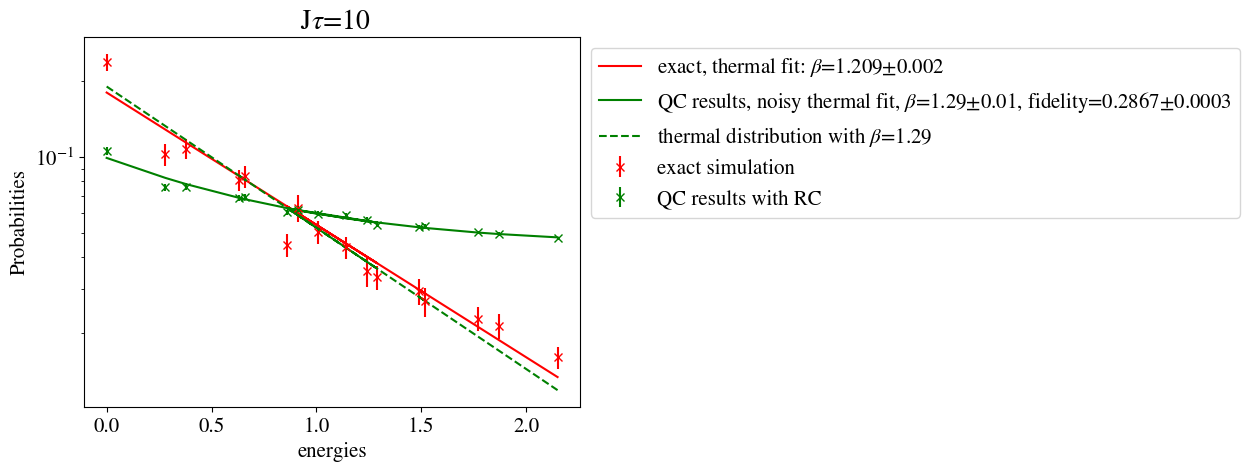

In [24]:
import matplotlib.pyplot as plt


plt.rcParams['font.size'] = 15   
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'


plt.errorbar(many_omegas,avg_pop_exact,fmt='x',yerr=std_pop_exact,color='red',label='exact simulation')
plt.errorbar(many_omegas,avg_pop_RC,fmt='x',yerr=std_pop_RC,color='green',label='QC results with RC')

plt.plot(many_omegas,thermal_distrib(many_omegas,fit_exact[0]),'-',color='red',label=r'exact, thermal fit: $\beta$='+str(round(fit_exact[0],3))+'$\pm$'+str(round(cov_exact[0][0],3)))
plt.plot(many_omegas,thermal_distrib_noisy(many_omegas,fit_RC[0],fit_RC[1]),'-',color='green',label=r'QC results, noisy thermal fit, $\beta$='+str(round(fit_RC[0],2))+'$\pm$'+str(round(cov_RC[0][0],2))+', fidelity='+str(round(fit_RC[1],4))+'$\pm$'+str(round(cov_RC[1][1],4)))
plt.plot(many_omegas,thermal_distrib(many_omegas,fit_RC[0]),'--',color='green',label=r'thermal distribution with $\beta$='+str(round(fit_RC[0],2)))


plt.yscale('log')
plt.xlabel('energies')
plt.ylabel('Probabilities')
sigma=1#standard deviation of the coupling strength's gaussian distribution
plt.title(label=r' J$\tau$='+str(round(sigma*t,2)),fontsize=20)
plt.legend(bbox_to_anchor=(1, 1.))
#plt.savefig('plot_session_themalization_1.pdf',bbox_inches='tight')

plt.show()

In [ ]:
lin